<a href="https://colab.research.google.com/github/wonderxiao/networkTrafficClassification/blob/dev/trafficTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!rm -rf model_*

In [0]:
!cp -r gdrive/My\ Drive/diffdata .

In [0]:
!ls

diffdata		model_large	  model_small	    smallData_acc.csv
gdrive			model_large10000  newdata_acc.csv
largeData10000_acc.csv	model_newdata	  ratioMax_acc.csv
largeData_acc.csv	model_ratiomax	  sample_data


In [0]:
!ls diffdata

largeData10000Mnist  newdataMnist   smallDataMnist
largeDataMnist	     ratioMaxMnist


In [0]:
!rm -rf model_*  *.csv

smallDataMnist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


读取数据完成
Training ------------
Train on 4619 samples, validate on 1540 samples
Epoch 1/100
4619/4619 [==============================] - 2s 533us/step - loss: 2.1533 - acc: 0.2314 - val_loss: 2.0588 - val_acc: 0.2695
Epoch 2/100
4619/4619 [==============================] - 1s 130us/step - loss: 2.0134 - acc: 0.3124 - val_loss: 1.9354 - val_acc: 0.3442
Epoch 3/100
4619/4619 [==============================] - 1s 127us/step - loss: 1.8913 - acc: 0.3557 - val_loss: 1.8136 - val_acc: 0.3786
Epoch 4/100
4619/4619 [==============================] - 1s 131us/step - loss: 1.7986 - acc: 0.3843 - val_loss: 1.7564 - val_acc: 0.4091
Epoch 5/100
4619/4619 [==============================] - 1s 128us/step - loss: 1.7318 - acc: 0.4133 - val_loss: 1.6752 - val_acc: 0.4377
Epoch 6/100
4619/4619 [==============================] - 1s 129us/step - loss: 1.6731 - acc: 0.4313 - val_loss: 1.6316 - val_acc: 0.4636
Epoch 7/100
4619/4619 [==============================] - 1s 132us/step - loss: 1.6248 - acc: 0.4507 -

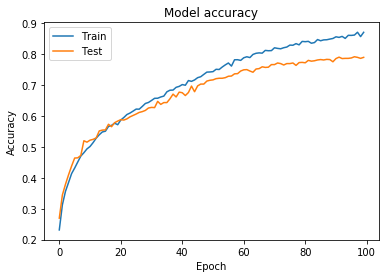

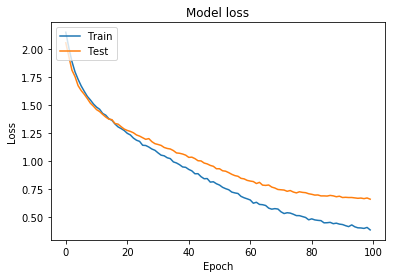

In [0]:
# -*- coding: utf-8 -*-
# @Time     :  17:50
# @Author   : XiaoKai
# @Email    : xk_1994@163.com
# @File     : traffic_cnn.py
# @Software: PyCharm
import os
import numpy as np

np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import gzip
import struct
import pandas as pd

def read_data(label_url,image_url):
    with gzip.open(label_url) as flbl:
        magic, num = struct.unpack(">II",flbl.read(8))
        label = np.fromstring(flbl.read(),dtype=np.int8)
    with gzip.open(image_url,'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII",fimg.read(16))
        image = np.fromstring(fimg.read(),dtype=np.uint8).reshape(len(label),rows,cols)
    return (label, image)

def load_data(filename):
    # 转换成灰度图---单通道
    img = Image.open(filename)
    #img = img1.convert('L')
    # 取出数据
    m_array = np.asarray(img, dtype='float32')
    # 取反
    # m_array = abs(255-m_array)
    return m_array


def read_image(image):
    data = load_data(image)
    data = data.reshape(-1,1,28,28).astype('float32') / 255.0
    return data

data_list = ['smallDataMnist','largeDataMnist','largeData10000Mnist','ratioMaxMnist','newdataMnist']

# 训练集的数据
pre_name = '/content/diffdata/'
suffix_train_label = '/train-labels-idx1-ubyte.gz'
suffix_train_image = '/train-images-idx3-ubyte.gz'
suffix_t10k_label = '/t10k-labels-idx1-ubyte.gz'
suffix_t10k_image = '/t10k-images-idx3-ubyte.gz'
suffix_acc = '_acc.csv'

(y_train, X_train) = read_data(pre_name+data_list[0]+suffix_train_label,pre_name+data_list[0]+suffix_train_image)

(y_test, X_test) = read_data(pre_name+data_list[0]+suffix_t10k_label,pre_name+data_list[0]+suffix_t10k_image)



print("读取数据完成")
# data pre-processing
X_train = X_train.reshape(-1, 1, 28, 28) / 255.
X_test = X_test.reshape(-1, 1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

models = ['model_small','model_large','model_large10000','model_ratiomax','model_newdata']
#if  not os.path.exists(models[i]):
# Another way to build your CNN

os.makedirs(models[0])

model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',  # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',  # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(Dropout(0.5))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
epochs = 100
history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)



print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test,verbose=1)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)
epochs = str(epochs)
data_list = [history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']]
index_list = ['acc_'+epochs, 'val_acc_'+epochs,'loss_'+epochs, 'val_loss_'+epochs]
print(data_list,index_list)
result_csv = pd.DataFrame(data=data_list, index=index_list)
result_csv.to_csv('smallData_acc.csv',mode='a',header=False)
result_csv = pd.DataFrame(data=[loss,accuracy], index=['test_loss_'+epochs,'test_acc_'+epochs])
result_csv.to_csv('smallData_acc.csv',mode='a',header=False)



print(history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save(os.path.join(models[0],'model_h5'))
model.save_weights(os.path.join(models[0],'my_model_weights.h5'))
  # 绘制训练 & 验证的准确率值


largeDataMnist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


读取数据完成
Training ------------
Train on 4415 samples, validate on 1472 samples
Epoch 1/100
4415/4415 [==============================] - 2s 414us/step - loss: 2.1198 - acc: 0.2093 - val_loss: 2.0232 - val_acc: 0.2914
Epoch 2/100
4415/4415 [==============================] - 1s 124us/step - loss: 1.9918 - acc: 0.3017 - val_loss: 1.8844 - val_acc: 0.3702
Epoch 3/100
4415/4415 [==============================] - 1s 126us/step - loss: 1.8561 - acc: 0.3771 - val_loss: 1.7512 - val_acc: 0.4450
Epoch 4/100
4415/4415 [==============================] - 1s 123us/step - loss: 1.7345 - acc: 0.4240 - val_loss: 1.6295 - val_acc: 0.4796
Epoch 5/100
4415/4415 [==============================] - 1s 124us/step - loss: 1.6139 - acc: 0.4827 - val_loss: 1.4975 - val_acc: 0.5435
Epoch 6/100
4415/4415 [==============================] - 1s 123us/step - loss: 1.5094 - acc: 0.5182 - val_loss: 1.4083 - val_acc: 0.5632
Epoch 7/100
4415/4415 [==============================] - 1s 126us/step - loss: 1.4102 - acc: 0.5653 -

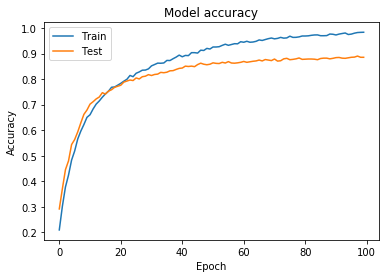

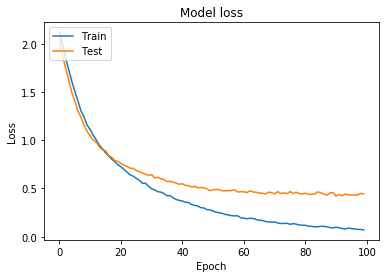

In [0]:
# -*- coding: utf-8 -*-
# @Time     :  17:50
# @Author   : XiaoKai
# @Email    : xk_1994@163.com
# @File     : traffic_cnn.py
# @Software: PyCharm
import os
import numpy as np

np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import gzip
import struct
import pandas as pd

def read_data(label_url,image_url):
    with gzip.open(label_url) as flbl:
        magic, num = struct.unpack(">II",flbl.read(8))
        label = np.fromstring(flbl.read(),dtype=np.int8)
    with gzip.open(image_url,'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII",fimg.read(16))
        image = np.fromstring(fimg.read(),dtype=np.uint8).reshape(len(label),rows,cols)
    return (label, image)

def load_data(filename):
    # 转换成灰度图---单通道
    img = Image.open(filename)
    #img = img1.convert('L')
    # 取出数据
    m_array = np.asarray(img, dtype='float32')
    # 取反
    # m_array = abs(255-m_array)
    return m_array


def read_image(image):
    data = load_data(image)
    data = data.reshape(-1,1,28,28).astype('float32') / 255.0
    return data

data_list = ['smallDataMnist','largeDataMnist','largeData10000Mnist','ratioMaxMnist','newdataMnist']

# 训练集的数据
pre_name = '/content/diffdata/'
suffix_train_label = '/train-labels-idx1-ubyte.gz'
suffix_train_image = '/train-images-idx3-ubyte.gz'
suffix_t10k_label = '/t10k-labels-idx1-ubyte.gz'
suffix_t10k_image = '/t10k-images-idx3-ubyte.gz'


(y_train, X_train) = read_data(pre_name+data_list[1]+suffix_train_label,pre_name+data_list[1]+suffix_train_image)

(y_test, X_test) = read_data(pre_name+data_list[1]+suffix_t10k_label,pre_name+data_list[1]+suffix_t10k_image)



print("读取数据完成")
# data pre-processing
X_train = X_train.reshape(-1, 1, 28, 28) / 255.
X_test = X_test.reshape(-1, 1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

models = ['model_small','model_large','model_large10000','model_ratiomax','model_newdata']
#if  not os.path.exists(models[i]):
# Another way to build your CNN
os.makedirs(models[1])

model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',  # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',  # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(Dropout(0.5))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
epochs = 100
history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)



print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test,verbose=1)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)
epochs = str(epochs)
data_list = [history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']]
index_list = ['acc_'+epochs, 'val_acc_'+epochs,'loss_'+epochs, 'val_loss_'+epochs]
print(data_list,index_list)
result_csv = pd.DataFrame(data=data_list, index=index_list)
result_csv.to_csv('largeData_acc.csv',mode='a',header=False)
result_csv = pd.DataFrame(data=[loss,accuracy], index=['test_loss_'+epochs,'test_acc_'+epochs])
result_csv.to_csv('largeData_acc.csv',mode='a',header=False)



print(history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save(os.path.join(models[1],'model_h5'))
model.save_weights(os.path.join(models[1],'my_model_weights.h5'))
  # 绘制训练 & 验证的准确率值

largeData10000Mnist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


读取数据完成
Training ------------
Train on 1503 samples, validate on 502 samples
Epoch 1/100
1503/1503 [==============================] - 1s 960us/step - loss: 2.1579 - acc: 0.2182 - val_loss: 2.0304 - val_acc: 0.2689
Epoch 2/100
1503/1503 [==============================] - 0s 142us/step - loss: 2.0951 - acc: 0.2615 - val_loss: 1.9883 - val_acc: 0.3984
Epoch 3/100
1503/1503 [==============================] - 0s 138us/step - loss: 2.0448 - acc: 0.2814 - val_loss: 1.9474 - val_acc: 0.2928
Epoch 4/100
1503/1503 [==============================] - 0s 125us/step - loss: 1.9942 - acc: 0.2908 - val_loss: 1.8698 - val_acc: 0.3984
Epoch 5/100
1503/1503 [==============================] - 0s 130us/step - loss: 1.9283 - acc: 0.3320 - val_loss: 1.7801 - val_acc: 0.4482
Epoch 6/100
1503/1503 [==============================] - 0s 130us/step - loss: 1.8488 - acc: 0.3706 - val_loss: 1.7067 - val_acc: 0.4880
Epoch 7/100
1503/1503 [==============================] - 0s 137us/step - loss: 1.7731 - acc: 0.4132 - 

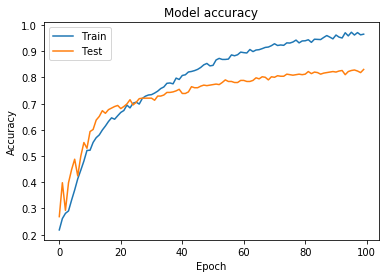

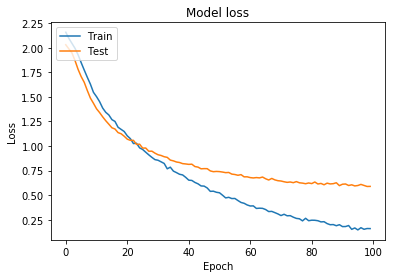

In [0]:
# -*- coding: utf-8 -*-
# @Time     :  17:50
# @Author   : XiaoKai
# @Email    : xk_1994@163.com
# @File     : traffic_cnn.py
# @Software: PyCharm
import os
import numpy as np

np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import gzip
import struct
import pandas as pd

def read_data(label_url,image_url):
    with gzip.open(label_url) as flbl:
        magic, num = struct.unpack(">II",flbl.read(8))
        label = np.fromstring(flbl.read(),dtype=np.int8)
    with gzip.open(image_url,'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII",fimg.read(16))
        image = np.fromstring(fimg.read(),dtype=np.uint8).reshape(len(label),rows,cols)
    return (label, image)

def load_data(filename):
    # 转换成灰度图---单通道
    img = Image.open(filename)
    #img = img1.convert('L')
    # 取出数据
    m_array = np.asarray(img, dtype='float32')
    # 取反
    # m_array = abs(255-m_array)
    return m_array


def read_image(image):
    data = load_data(image)
    data = data.reshape(-1,1,28,28).astype('float32') / 255.0
    return data

data_list = ['smallDataMnist','largeDataMnist','largeData10000Mnist','ratioMaxMnist','newdataMnist']

# 训练集的数据
pre_name = '/content/diffdata/'
suffix_train_label = '/train-labels-idx1-ubyte.gz'
suffix_train_image = '/train-images-idx3-ubyte.gz'
suffix_t10k_label = '/t10k-labels-idx1-ubyte.gz'
suffix_t10k_image = '/t10k-images-idx3-ubyte.gz'


(y_train, X_train) = read_data(pre_name+data_list[2]+suffix_train_label,pre_name+data_list[2]+suffix_train_image)

(y_test, X_test) = read_data(pre_name+data_list[2]+suffix_t10k_label,pre_name+data_list[2]+suffix_t10k_image)



print("读取数据完成")
# data pre-processing
X_train = X_train.reshape(-1, 1, 28, 28) / 255.
X_test = X_test.reshape(-1, 1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

models = ['model_small','model_large','model_large10000','model_ratiomax','model_newdata']
#if  not os.path.exists(models[i]):
# Another way to build your CNN
os.makedirs(models[2])

model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',  # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',  # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(Dropout(0.5))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
epochs = 100
history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)



print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test,verbose=1)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)
epochs = str(epochs)
data_list = [history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']]
index_list = ['acc_'+epochs, 'val_acc_'+epochs,'loss_'+epochs, 'val_loss_'+epochs]
print(data_list,index_list)
result_csv = pd.DataFrame(data=data_list, index=index_list)
result_csv.to_csv('largeData10000_acc.csv',mode='a',header=False)
result_csv = pd.DataFrame(data=[loss,accuracy], index=['test_loss_'+epochs,'test_acc_'+epochs])
result_csv.to_csv('largeData10000_acc.csv',mode='a',header=False)



print(history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save(os.path.join(models[2],'model_h5'))
model.save_weights(os.path.join(models[2],'my_model_weights.h5'))
  # 绘制训练 & 验证的准确率值

ratioMaxMnist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


读取数据完成
Training ------------
Train on 5379 samples, validate on 1793 samples
Epoch 1/100
5379/5379 [==============================] - 2s 393us/step - loss: 1.9185 - acc: 0.2802 - val_loss: 1.6547 - val_acc: 0.3904
Epoch 2/100
5379/5379 [==============================] - 1s 127us/step - loss: 1.6236 - acc: 0.3945 - val_loss: 1.4898 - val_acc: 0.4640
Epoch 3/100
5379/5379 [==============================] - 1s 127us/step - loss: 1.4762 - acc: 0.4661 - val_loss: 1.3478 - val_acc: 0.5081
Epoch 4/100
5379/5379 [==============================] - 1s 127us/step - loss: 1.3510 - acc: 0.5152 - val_loss: 1.2449 - val_acc: 0.5756
Epoch 5/100
5379/5379 [==============================] - 1s 131us/step - loss: 1.2479 - acc: 0.5598 - val_loss: 1.1599 - val_acc: 0.5901
Epoch 6/100
5379/5379 [==============================] - 1s 128us/step - loss: 1.1728 - acc: 0.5893 - val_loss: 1.1104 - val_acc: 0.6141
Epoch 7/100
5379/5379 [==============================] - 1s 129us/step - loss: 1.1108 - acc: 0.6146 -

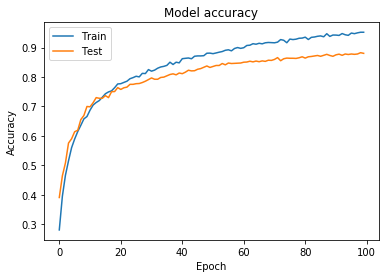

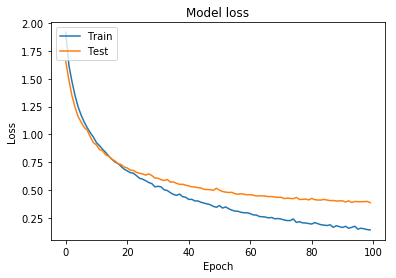

In [0]:
# -*- coding: utf-8 -*-
# @Time     :  17:50
# @Author   : XiaoKai
# @Email    : xk_1994@163.com
# @File     : traffic_cnn.py
# @Software: PyCharm
import os
import numpy as np

np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import gzip
import struct
import pandas as pd

def read_data(label_url,image_url):
    with gzip.open(label_url) as flbl:
        magic, num = struct.unpack(">II",flbl.read(8))
        label = np.fromstring(flbl.read(),dtype=np.int8)
    with gzip.open(image_url,'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII",fimg.read(16))
        image = np.fromstring(fimg.read(),dtype=np.uint8).reshape(len(label),rows,cols)
    return (label, image)

def load_data(filename):
    # 转换成灰度图---单通道
    img = Image.open(filename)
    #img = img1.convert('L')
    # 取出数据
    m_array = np.asarray(img, dtype='float32')
    # 取反
    # m_array = abs(255-m_array)
    return m_array


def read_image(image):
    data = load_data(image)
    data = data.reshape(-1,1,28,28).astype('float32') / 255.0
    return data

data_list = ['smallDataMnist','largeDataMnist','largeData10000Mnist','ratioMaxMnist','newdataMnist']

# 训练集的数据
pre_name = '/content/diffdata/'
suffix_train_label = '/train-labels-idx1-ubyte.gz'
suffix_train_image = '/train-images-idx3-ubyte.gz'
suffix_t10k_label = '/t10k-labels-idx1-ubyte.gz'
suffix_t10k_image = '/t10k-images-idx3-ubyte.gz'


(y_train, X_train) = read_data(pre_name+data_list[3]+suffix_train_label,pre_name+data_list[3]+suffix_train_image)

(y_test, X_test) = read_data(pre_name+data_list[3]+suffix_t10k_label,pre_name+data_list[3]+suffix_t10k_image)



print("读取数据完成")
# data pre-processing
X_train = X_train.reshape(-1, 1, 28, 28) / 255.
X_test = X_test.reshape(-1, 1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

models = ['model_small','model_large','model_large10000','model_ratiomax','model_newdata']
#if  not os.path.exists(models[i]):
# Another way to build your CNN
os.makedirs(models[3])

model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',  # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',  # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(Dropout(0.5))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
epochs = 100
history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)



print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test,verbose=1)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)
epochs = str(epochs)
data_list = [history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']]
index_list = ['acc_'+epochs, 'val_acc_'+epochs,'loss_'+epochs, 'val_loss_'+epochs]
print(data_list,index_list)
result_csv = pd.DataFrame(data=data_list, index=index_list)
result_csv.to_csv('ratioMax_acc.csv',mode='a',header=False)
result_csv = pd.DataFrame(data=[loss,accuracy], index=['test_loss_'+epochs,'test_acc_'+epochs])
result_csv.to_csv('ratioMax_acc.csv',mode='a',header=False)



print(history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save(os.path.join(models[3],'model_h5'))
model.save_weights(os.path.join(models[3],'my_model_weights.h5'))
  # 绘制训练 & 验证的准确率值

newdataMnist

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


读取数据完成
Training ------------
Train on 10077 samples, validate on 3359 samples
Epoch 1/100
10077/10077 [==============================] - 3s 312us/step - loss: 2.1511 - acc: 0.2034 - val_loss: 2.0468 - val_acc: 0.3075
Epoch 2/100
10077/10077 [==============================] - 1s 136us/step - loss: 1.9741 - acc: 0.3170 - val_loss: 1.8443 - val_acc: 0.4028
Epoch 3/100
10077/10077 [==============================] - 1s 136us/step - loss: 1.7860 - acc: 0.4045 - val_loss: 1.6769 - val_acc: 0.4686
Epoch 4/100
10077/10077 [==============================] - 1s 136us/step - loss: 1.6506 - acc: 0.4605 - val_loss: 1.5453 - val_acc: 0.5138
Epoch 5/100
10077/10077 [==============================] - 1s 135us/step - loss: 1.5447 - acc: 0.5013 - val_loss: 1.4414 - val_acc: 0.5487
Epoch 6/100
10077/10077 [==============================] - 1s 127us/step - loss: 1.4616 - acc: 0.5348 - val_loss: 1.3582 - val_acc: 0.5746
Epoch 7/100
10077/10077 [==============================] - 1s 128us/step - loss: 1.3818 

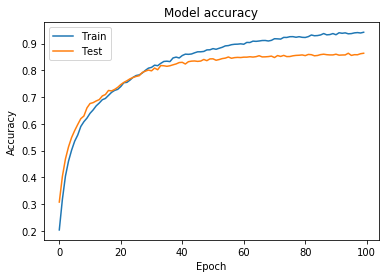

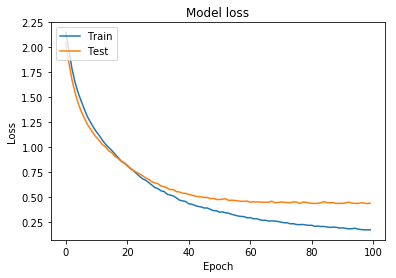

In [0]:
# -*- coding: utf-8 -*-
# @Time     :  17:50
# @Author   : XiaoKai
# @Email    : xk_1994@163.com
# @File     : traffic_cnn.py
# @Software: PyCharm
import os
import numpy as np

np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import gzip
import struct
import pandas as pd

def read_data(label_url,image_url):
    with gzip.open(label_url) as flbl:
        magic, num = struct.unpack(">II",flbl.read(8))
        label = np.fromstring(flbl.read(),dtype=np.int8)
    with gzip.open(image_url,'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII",fimg.read(16))
        image = np.fromstring(fimg.read(),dtype=np.uint8).reshape(len(label),rows,cols)
    return (label, image)

def load_data(filename):
    # 转换成灰度图---单通道
    img = Image.open(filename)
    #img = img1.convert('L')
    # 取出数据
    m_array = np.asarray(img, dtype='float32')
    # 取反
    # m_array = abs(255-m_array)
    return m_array


def read_image(image):
    data = load_data(image)
    data = data.reshape(-1,1,28,28).astype('float32') / 255.0
    return data

data_list = ['smallDataMnist','largeDataMnist','largeData10000Mnist','ratioMaxMnist','newdataMnist']

# 训练集的数据
pre_name = '/content/diffdata/'
suffix_train_label = '/train-labels-idx1-ubyte.gz'
suffix_train_image = '/train-images-idx3-ubyte.gz'
suffix_t10k_label = '/t10k-labels-idx1-ubyte.gz'
suffix_t10k_image = '/t10k-images-idx3-ubyte.gz'


(y_train, X_train) = read_data(pre_name+data_list[4]+suffix_train_label,pre_name+data_list[4]+suffix_train_image)

(y_test, X_test) = read_data(pre_name+data_list[4]+suffix_t10k_label,pre_name+data_list[4]+suffix_t10k_image)



print("读取数据完成")
# data pre-processing
X_train = X_train.reshape(-1, 1, 28, 28) / 255.
X_test = X_test.reshape(-1, 1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

models = ['model_small','model_large','model_large10000','model_ratiomax','model_newdata']
#if  not os.path.exists(models[i]):
# Another way to build your CNN
os.makedirs(models[4])

model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',  # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',  # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

model.add(Dropout(0.5))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Training ------------')
# Another way to train the model
epochs = 100
history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=64, verbose=1)



print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test,verbose=1)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)
epochs = str(epochs)
data_list = [history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']]
index_list = ['acc_'+epochs, 'val_acc_'+epochs,'loss_'+epochs, 'val_loss_'+epochs]
print(data_list,index_list)
result_csv = pd.DataFrame(data=data_list, index=index_list)
result_csv.to_csv('newdata_acc.csv',mode='a',header=False)
result_csv = pd.DataFrame(data=[loss,accuracy], index=['test_loss_'+epochs,'test_acc_'+epochs])
result_csv.to_csv('newdata_acc.csv',mode='a',header=False)



print(history.history)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.save(os.path.join(models[4],'model_h5'))
model.save_weights(os.path.join(models[4],'my_model_weights.h5'))
  # 绘制训练 & 验证的准确率值

In [0]:
!ls

diffdata		model_large	  model_small	    smallData_acc.csv
gdrive			model_large10000  newdata_acc.csv
largeData10000_acc.csv	model_newdata	  ratioMax_acc.csv
largeData_acc.csv	model_ratiomax	  sample_data


In [0]:
!cp -r model_* *.csv gdrive/My\ Drive/result